# Three-Dimensional Plotting in Matplotlib

- 3D plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [32]:
from mpl_toolkits import mplot3d

- 3D axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

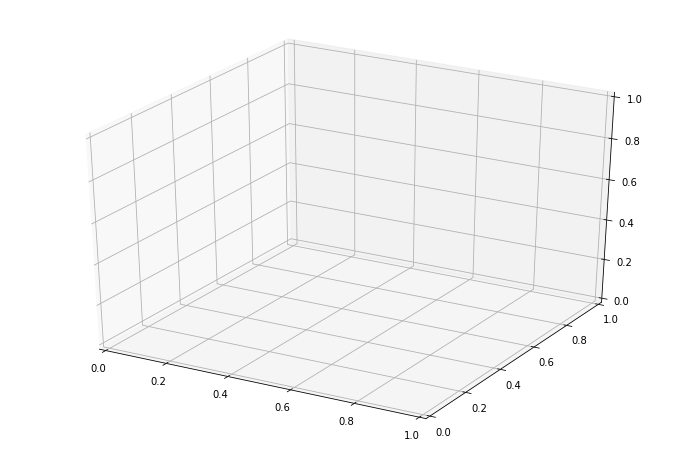

In [34]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

* __3D plotting benefits immensely from viewing figures interactively rather than statically in the notebook__. Use ``%matplotlib notebook`` instead of ``%matplotlib inline`` to use interactive figures.

### Three-dimensional Points and Lines

- The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. They can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
- The call signature for these is nearly identical to that of their 2D counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
- Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

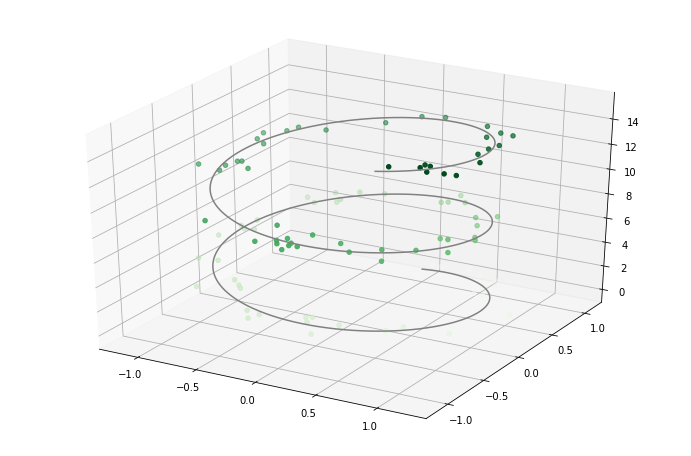

In [35]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

- Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the 3D effect can be difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

### 3D Contour Plots

- Much like 2D ``ax.contour`` plots, ``ax.contour3D`` requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [36]:
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

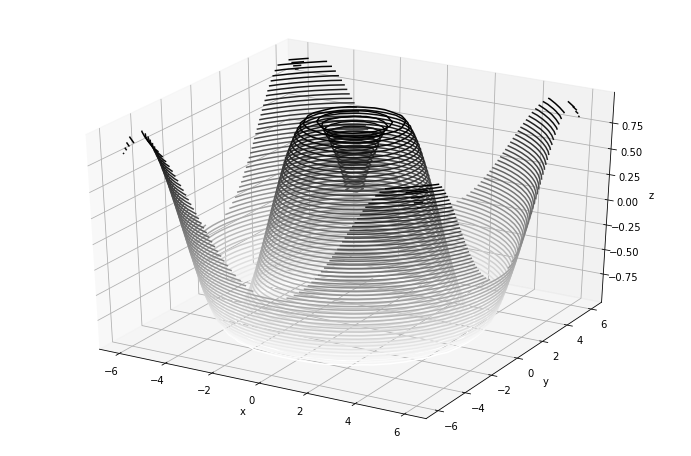

In [37]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

- Sometimes the default viewing angle is not optimal - we can use the ``view_init`` method to set the elevation and azimuthal angles. 
- Set the elevation to 60 degrees (above the x-y plane) & azimuth to 35 degrees (rotated 35 degrees counter-clockwise about the z-axis):

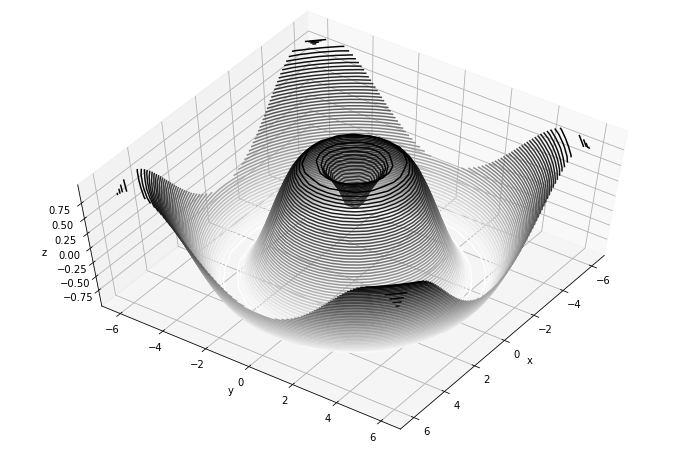

In [38]:
ax.view_init(60, 35)
fig

- This type of rotation can be done interactively as well.

### Wireframes and Surface Plots

- Wireframes and surface plots take a grid of values and project it onto the specified 3Dl surface, and can make the resulting 3D forms easy to visualize.

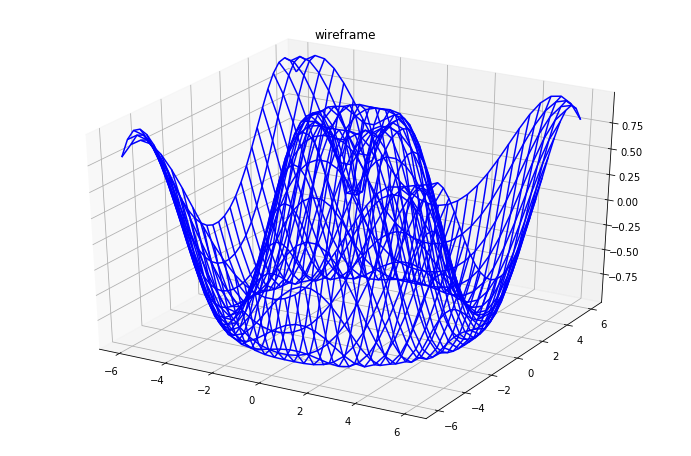

In [39]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('wireframe');

- A surface plot is like a wireframe plot, but __each face of the wireframe is a filled polygon__. Adding a colormap to the filled polygons aids perception of the surface topology.

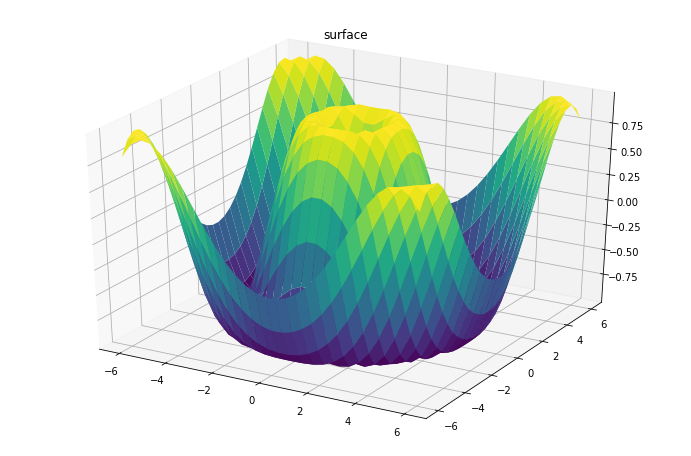

In [40]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

- While the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear.
- This is an example of __a partial polar grid__, which when used with the ``surface3D`` plot can give us a slice into the function we're visualizing:

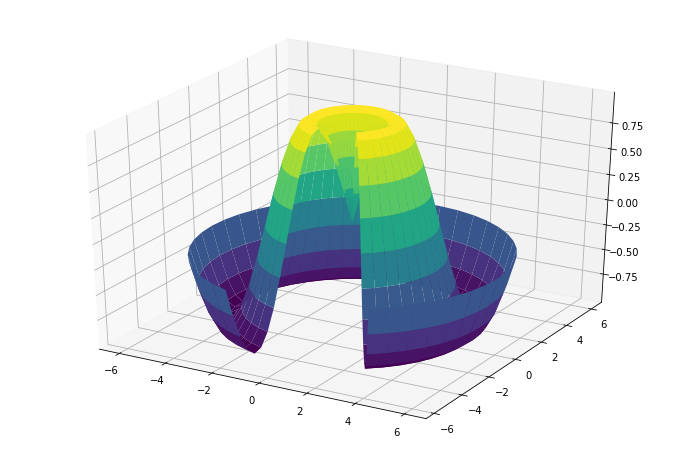

In [42]:
fig = plt.figure(figsize=(12,8))

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

### Surface Triangulations
- Evenly sampled grids can sometimes be overly restrictive.
- In these situations, __triangulation-based plots__ can be very useful. What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [43]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

- First, __create a scatter plot__ to see the surface we're sampling from:

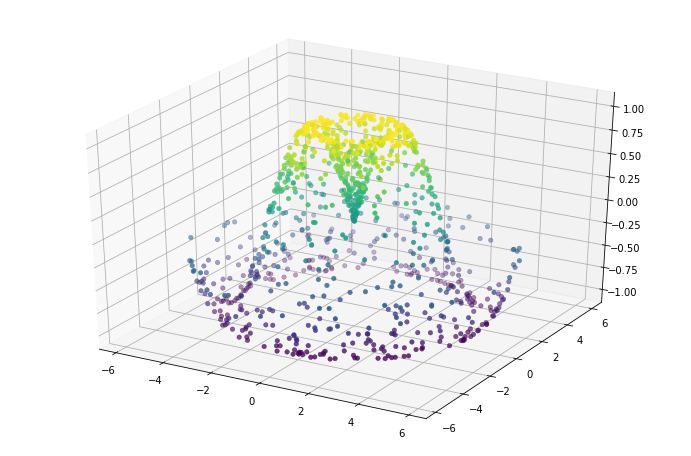

In [44]:
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

- __Improve this plot with ``ax.plot_trisurf``, which creates a surface by first finding a set of triangles formed between adjacent points__ (remember that x, y, and z here are one-dimensional arrays).

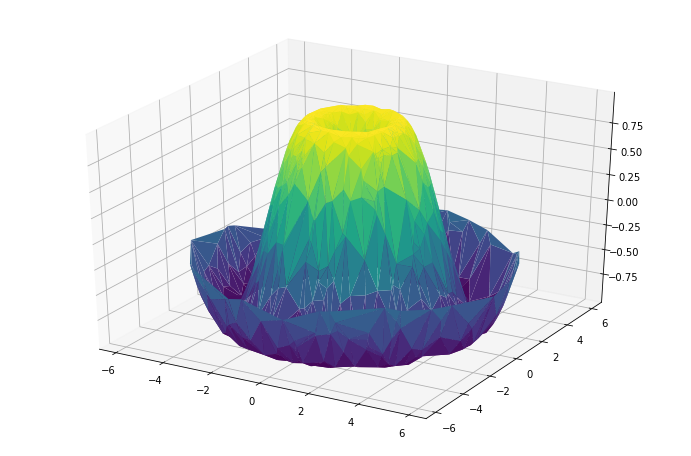

In [45]:
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

### Example: Visualizing a Möbius strip

- A Möbius strip is similar to a strip of paper glued into a loop with a half-twist.
- The key to creating the Möbius strip is to think about its parameters. It's a 2D strip, so we need two intrinsic dimensions. Let's call them $\theta$, which ranges from $0$ to $2\pi$ around the loop, and $w$ which ranges from -1 to 1 across the width of the strip:

In [46]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

- Now we need the *(x, y, z)* positions of the embedded strip.
- There are __two rotations__: (1) the position of the loop about its center (what we've called $\theta$); (2) the twisting of the strip about its axis (we'll call this $\phi$). 
- For a Möbius strip, we must have the strip makes half a twist during a full loop, or $\Delta\phi = \Delta\theta/2$.

In [47]:
phi = 0.5 * theta

- Define $r$, the distance of each point from the center, and use this to find the embedded $(x, y, z)$ coordinates:

In [48]:
# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

- Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to __define the triangulation *within the underlying parametrization*__, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip.

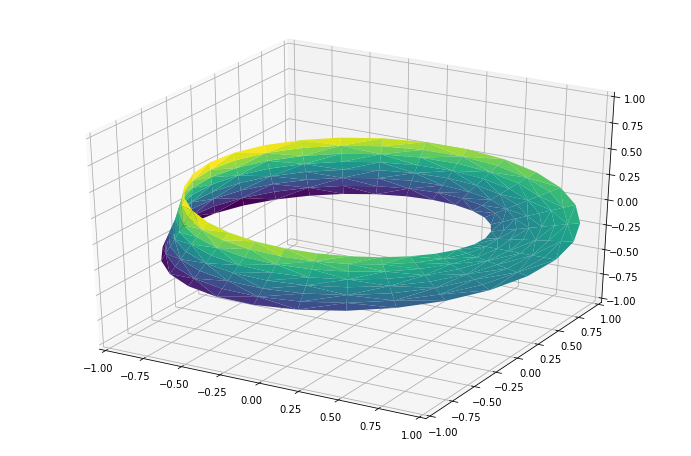

In [50]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);